In [1]:
## import libraries 
import pandas as pd 
import numpy as np 
import sqlite3
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt 
import re
import warnings
warnings.filterwarnings('ignore')


In [5]:
## read data 
data=pd.read_csv("used_car_dataset.csv")

# first five rows of data 
data.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             2105 non-null   object
 1   car_price_in_rupees  2105 non-null   object
 2   kms_driven           2105 non-null   object
 3   fuel_type            2105 non-null   object
 4   city                 2105 non-null   object
 5   year_of_manufacture  2105 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 98.8+ KB


In [7]:
## cheaking null value 
data.isnull().sum()

car_name               0
car_price_in_rupees    0
kms_driven             0
fuel_type              0
city                   0
year_of_manufacture    0
dtype: int64

In [8]:
data['car_price_in_rupees'] = data['car_price_in_rupees'].str.replace(',', '')
data['car_price_in_rupees'] = data['car_price_in_rupees'].str.replace('₹', '')
data['car_price_in_rupees']=data['car_price_in_rupees'].str.replace(r'[a-z]+','')
data['car_price_in_rupees']=data['car_price_in_rupees'].str.replace(r'[A-Z]','')
data['kms_driven']=data['kms_driven'].str.replace(r'[a-z]+','')
data['year_of_manufacture']=pd.to_datetime(data['year_of_manufacture'])

# car manufacture  yearly

<Axes: >

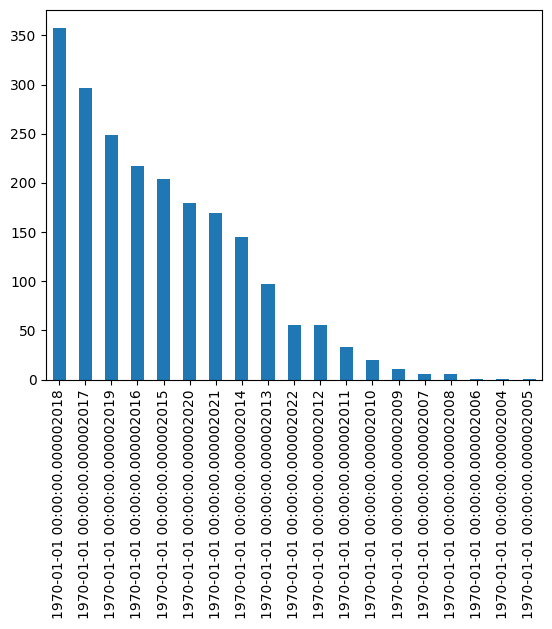

In [9]:
data['year_of_manufacture'].value_counts().plot.bar()

as we seen that in 2018  there are maximum no of car will manufacture 

# maximum car for  sale 

In [10]:
m_S=pd.DataFrame(data['car_name'].value_counts()).reset_index().head(20)
fig=px.bar(m_S,x='index',y='car_name')
fig.show()

# Mostly used car  drive

In [11]:
c_d=data[['car_name','kms_driven','year_of_manufacture']].sort_values(by='kms_driven',ascending=True).reset_index().head(20)
fig=px.bar(c_d,x='car_name',y='kms_driven',color='year_of_manufacture')
fig.show()

# Price of most used cars

In [12]:
a_d=data[['car_name','car_price_in_rupees','kms_driven','fuel_type']].sort_values(by='kms_driven',ascending=False).tail(20)
a_d['car_price_in_rupees']=a_d['car_price_in_rupees'].astype('float')
fig=px.pie(a_d,names='car_name',values='car_price_in_rupees')
fig.show()

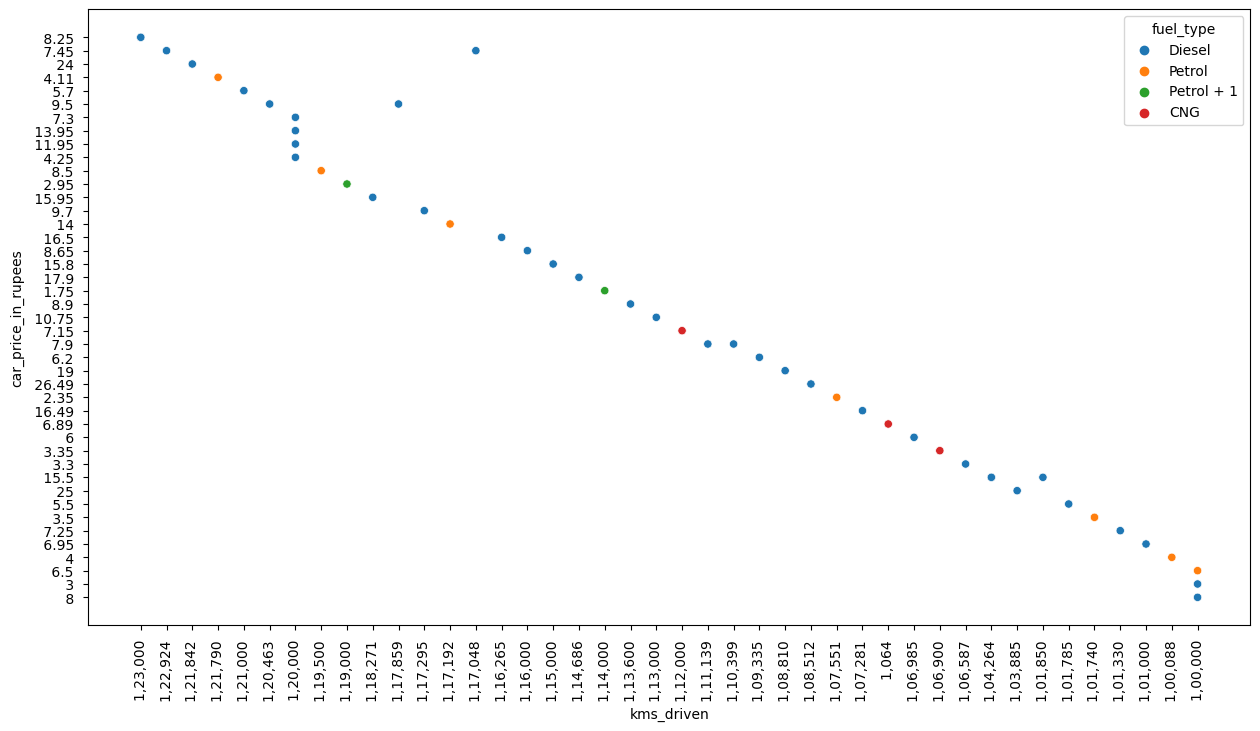

In [13]:
a_dd=data[['car_name','car_price_in_rupees','kms_driven','fuel_type']].sort_values(by='kms_driven',ascending=False).tail(50)

plt.figure(figsize=(15,8))
sns.scatterplot(data=a_dd,x='kms_driven',y='car_price_in_rupees',hue='fuel_type')
plt.xticks(rotation=90)
plt.show()

# Cities has no of cars 

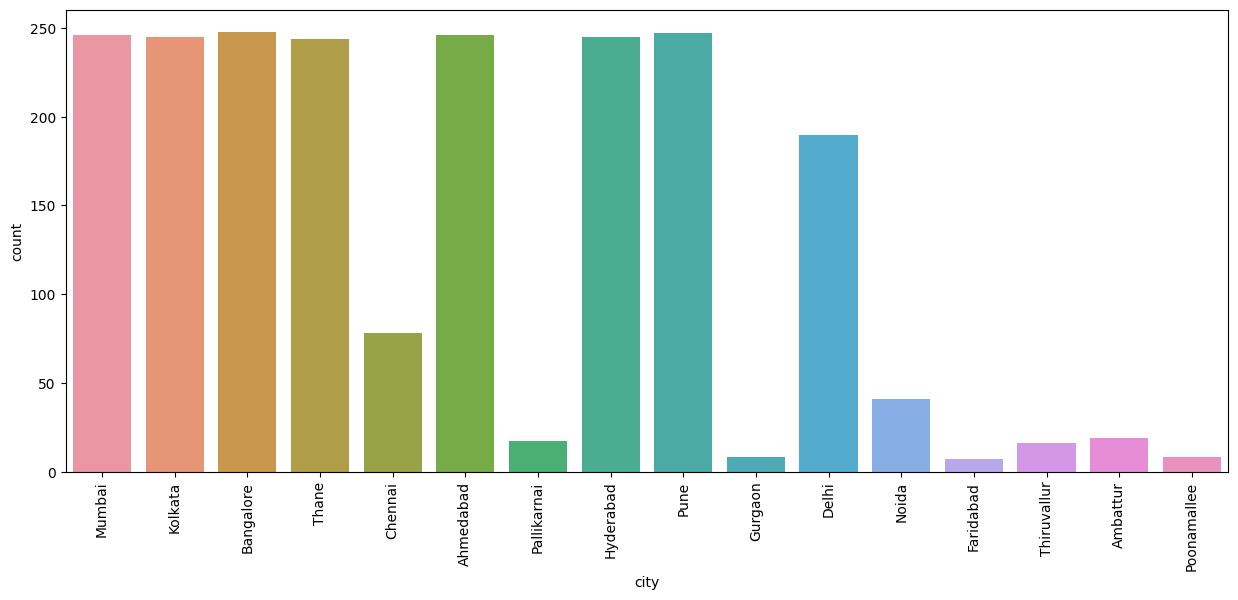

In [14]:
n_dt=data[['city','fuel_type','kms_driven']]
plt.figure(figsize=(15,6))
sns.countplot(data=n_dt,x='city')
plt.xticks(rotation=90)
plt.show()

# fuel type  

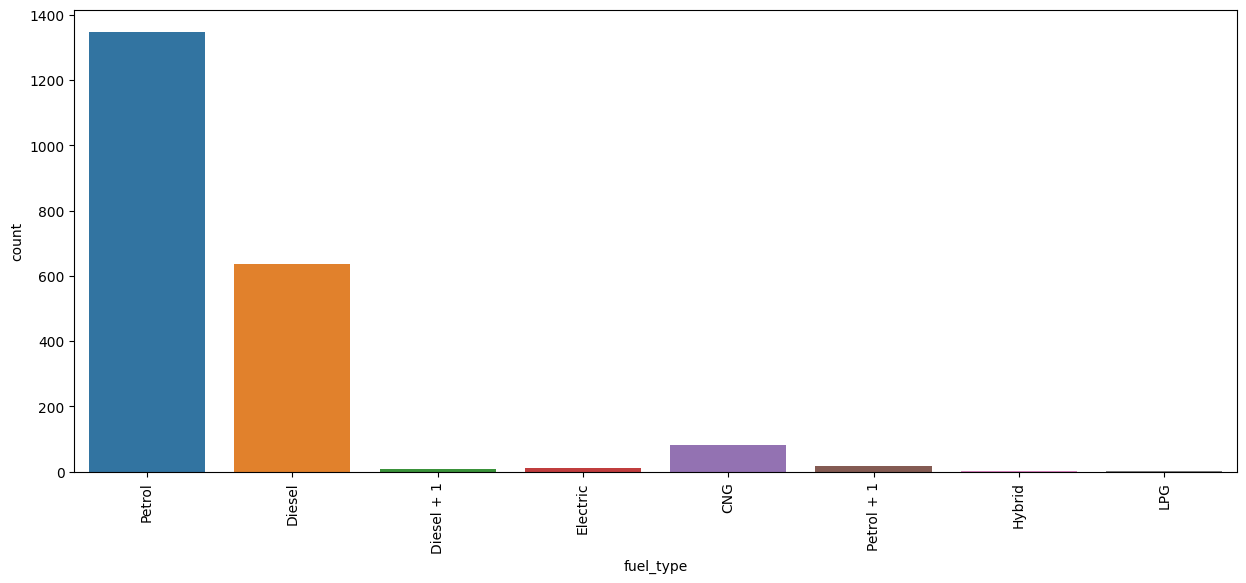

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=n_dt,x='fuel_type')
plt.xticks(rotation=90)
plt.show()

# No of car driven in cities 

In [16]:
fig=px.bar(n_dt,x='city',y='kms_driven',color='fuel_type')
fig.show()

# Car manufacture yearly  with fuel type

In [15]:
n_d1=data[['fuel_type','kms_driven','car_price_in_rupees','city','year_of_manufacture']]
fig = px.histogram(n_d1, x="year_of_manufacture", y="year_of_manufacture",color='fuel_type')
fig.show()

# Car manufacture yearly  with cities

In [17]:
fig = px.histogram(n_d1, x="year_of_manufacture", y="year_of_manufacture",color='city')
fig.show()

# car driven  in cities 

In [18]:
fig = px.strip(data, x="kms_driven", y="city", orientation="h", color="fuel_type")
fig.show()

# THANK YOU